# Iris Dataset - Classification Example

scikit-learn has some preloaded datasets that can be useful in exploring its functionality. It's a good way to get started really quickly and temporarily ignore writing the boilerplate code to actually import and prepare your data for processing (which is definitely important to learn eventually!).

In the following sections, the code illustrates how we take a famous dataset and build a decision tree classifier for it. The dataset consists of various iris flower petal and sepal lengths and widths, which can be used to classify the iris into one of the 3 varieties: 'Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'. 

The sections below walk you through the 3 common stages of working with Machine Learning models:

1. Load data
2. Train model
3. Test/validate model

-----

## 1. Load and explore the data

The cells in this section illustrate how to load and explore a dataset from scikit-learn. 

For a complete list of the available "toy datasets", see https://scikit-learn.org/stable/datasets/index.html#toy-datasets

Also note that scikit-learn has several much larger datasets you can load and run models against: https://scikit-learn.org/stable/datasets/index.html#real-world-datasets

In [1]:
# Import scikit-learn's scikit-learn's module to use their "toy datasets"
from sklearn import datasets

In [2]:
# Loads in the Iris dataset
iris = datasets.load_iris()

In [3]:
# Description of the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# feature_names shows what each column represents
print(iris.feature_names)
# data is the matrix INPUT features in the dataset
print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

In [5]:
# Check dimensions of the input feature matrix
iris.data.shape
# (150, 4) = 150 rows x 4 columns = 150 observations x 4 input features each

(150, 4)

In [6]:
# target_names shows the names of the labels of the outputs 
print(iris.target_names)
print(iris.target)
# Note that the labels are assigned integer values in the output
# '0' = first label, '1' = second label, and so on

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# Check dimensions of the output
iris.target.shape
# (150,) = Array of 150 elements = 150 target values (1 per observation)

(150,)

-----

## 2. Train the Model

This section shows you how to go about training your decision tree.

It illustrates the steps of:

1. Preparing a train vs test dataset
2. Initializing and training the decision tree classifier
3. Visualizing the decision tree

In [8]:
# Setup the training and test datasets
# Training data allows us to train the model
# Test dataset allows us to then validate the accuracy predictions of that model

# We want to split the dataset randomly to get the test and train datasets
# We're using sklearn function `train_test_split` that randomizes the split for us
from sklearn.model_selection import train_test_split

# sklearn convention is to use "X" for input feature matrix, "y" for target values
X_train, X_test, y_train, y_test = train_test_split(
    iris.data,    # sampled input features
    iris.target,  # target values corresponding to inputs
    test_size=50  # 50 samples (= 1/3rd of dataset) used for training data
)

In [9]:
# Let's inspect the splits
print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_train: " + str(y_train))
print("y_test: " + str(y_test))
# Confirm that both the test and train datasets contain some of all 3 labels

X_train shape: (100, 4)
X_test shape: (50, 4)
y_train: [0 0 0 1 2 1 1 1 0 2 1 0 2 1 1 1 0 0 2 1 0 1 1 2 1 2 0 0 1 1 0 2 1 1 2 2 0
 0 1 1 2 2 0 2 0 0 0 1 2 1 2 2 1 1 0 2 0 2 0 2 1 0 2 1 0 1 0 2 0 1 2 0 1 1
 0 2 1 2 2 2 2 2 2 0 0 1 2 1 0 1 1 0 1 0 0 2 1 2 2 0]
y_test: [2 0 1 2 1 0 0 2 2 0 2 1 1 0 0 1 2 1 1 2 2 1 1 0 2 0 1 2 0 0 2 0 0 2 1 0 2
 0 2 2 2 0 1 2 0 0 2 1 1 1]


In [10]:
from sklearn import tree

# "clf" by scikit-learn convention is a variable name used for "classifier"
clf = tree.DecisionTreeClassifier()

# Simply printing this classifier will show the available parameters we can set when initializing it
# Since we didn't set any, the printed values will show the defaults
print(clf)
# For the very curious, you can read the docstring to see what the various parameters mean here:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [11]:
# Train the model
clf = clf.fit(X_train, y_train)

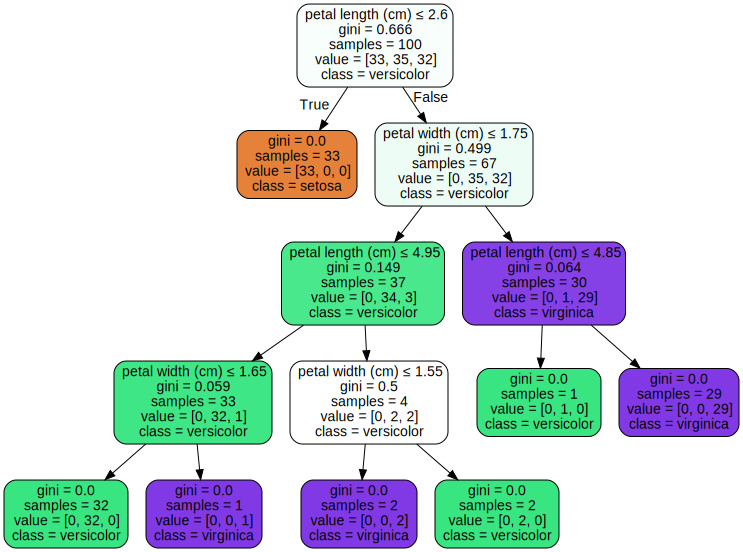

In [12]:
# Graphviz is open source software that allows visualization of graphs of any sort
# We can use it visualize what our resulting decision tree looks like
import graphviz

# scikit-learn's `tree` module has a built-in `export_graphviz` function that exports a data structure
# which graphviz can read and then draw the graph it represents. It has a variety of options you can 
# specify to make your output graph more meaningful/aesthetically pleasing :)
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
# If you uncomment and run the following command, it outputs the graph to a file named "iris.pdf"
# graph = graph.render("iris")  
graph

-----

## 3. Test the model

Final step is to validate the accuracy of your resulting model. These cells illustrate:

1. How to get predicted values from your trained model
2. How to measure the accuracy of your predictions using scikit-learn

In [13]:
# Let's test the accuracy of our model!
import numpy as np

# Predict the values from your test inputs X_test
y_pred = clf.predict(X_test)

# join the actual and predicted values to visually compare
# y_compare will have 3 columns: actual output, predicted output, diff between the two
# If the last column is non-zero, it means the prediction didn't match the actual value
# Note the ".T" transposes the matrix so we can see the values column-wise
y_compare = np.vstack((y_test, y_pred, y_test-y_pred)).T
print(y_compare)

[[2 2 0]
 [0 0 0]
 [1 1 0]
 [2 1 1]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [2 1 1]
 [2 2 0]
 [0 0 0]
 [2 2 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [2 1 1]
 [1 1 0]
 [1 1 0]
 [2 2 0]
 [2 2 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [2 2 0]
 [0 0 0]
 [1 1 0]
 [2 2 0]
 [0 0 0]
 [0 0 0]
 [2 2 0]
 [0 0 0]
 [0 0 0]
 [2 2 0]
 [1 1 0]
 [0 0 0]
 [2 2 0]
 [0 0 0]
 [2 2 0]
 [2 2 0]
 [2 2 0]
 [0 0 0]
 [1 1 0]
 [2 2 0]
 [0 0 0]
 [0 0 0]
 [2 2 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]]


In [14]:
# Formal accuracy metrics

# Outputs the proportion of predictions that were correct
# i.e., 1.0 = 100% accurate, 0.0 = 0% accurate
score = clf.score(X_test, y_test)
print(score)

0.94
